In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

%matplotlib inline

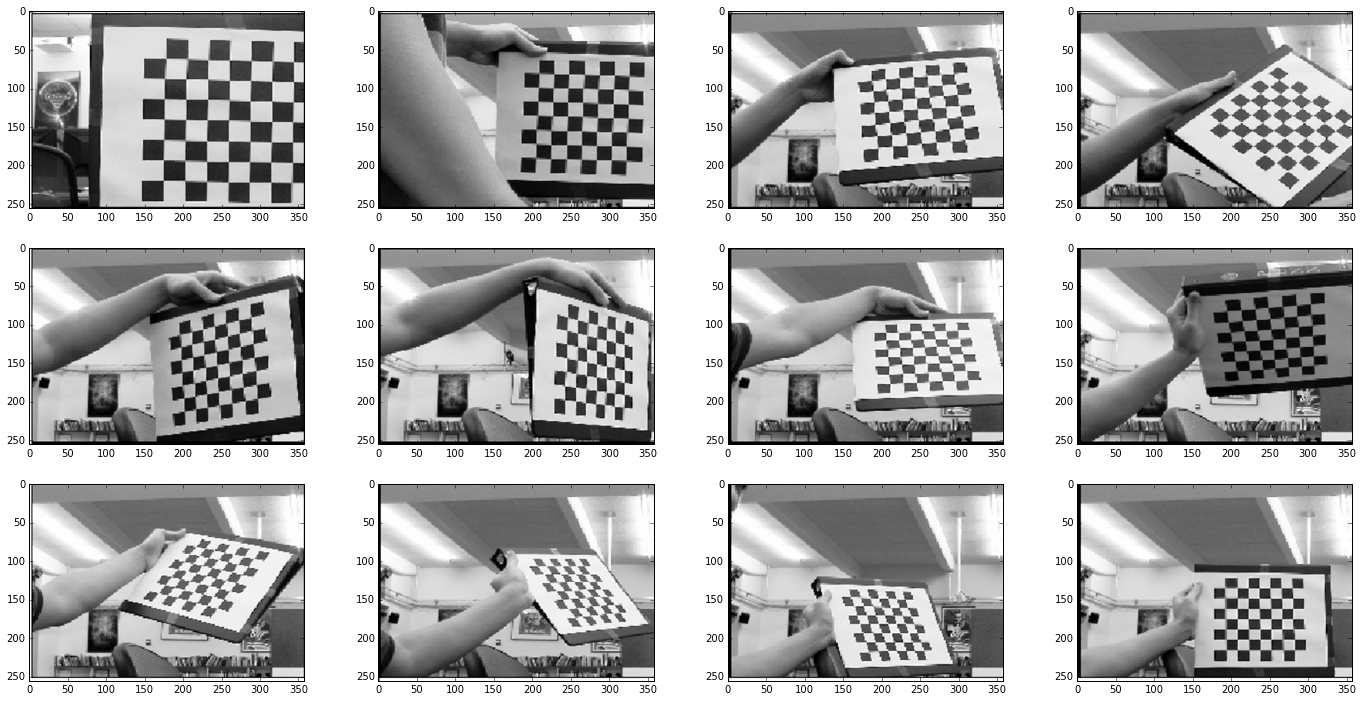

In [2]:
image = cv2.imread('C:/TEMP/Chessboard.png', 0)

h, w = image.shape
nh, nw = (3, 4)
chess = [None] * nh * nw

h /= nh
w /= nw

for i in range(nh):
    for j in range(nw):
        chess[i*nw + j] = image[i*h : (i+1)*h, j*w : (j+1)*w]

f, ax = plt.subplots(nh, nw, figsize=(6*nw, 4*nh))

for i in range(nh):
    for j in range(nw):
        ax[i, j].imshow(chess[i*nw + j], cmap='Greys_r')

#ax[0].imshow(image[:, :, ::-1])
#ax[1].imshow(rot_image[:, :, ::-1])
plt.show()

In [3]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((7*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7, 0:7].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
    
suc = [None]*nw*nh
corners = [None]*nw*nh
imgs = []#[None]*nw*nh

for i, gray in enumerate(chess):
        
    img = cv2.merge((gray, gray, gray))

    # Find the chess board corners
    suc[i], corners[i] = cv2.findChessboardCorners(gray, (7, 7), None)

    # If found, add object points, image points (after refining them)
    if suc[i]:
        
        objpoints.append(objp)
        imgpoints.append(corners[i])
        
    #else:
    cv2.drawChessboardCorners(img, (7,7), corners[i], suc[i])
    imgs.append(img)


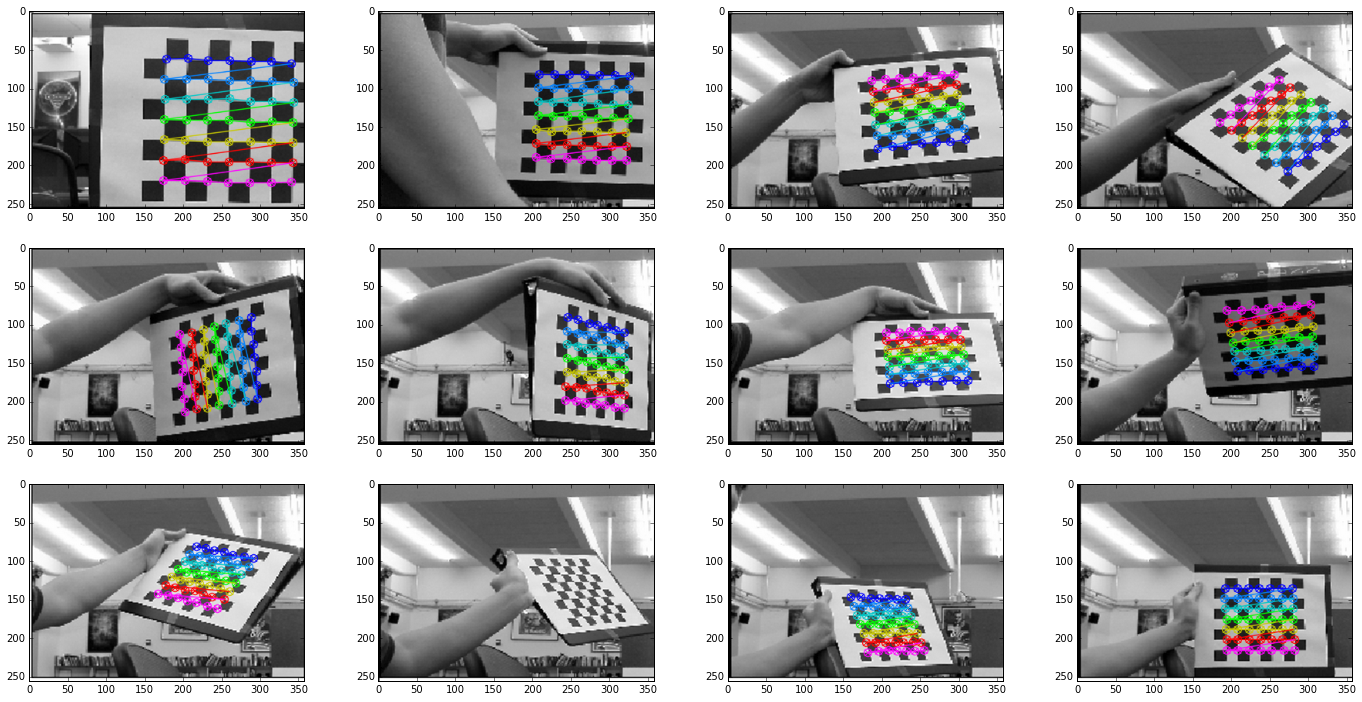

In [7]:
f, ax = plt.subplots(nh, nw, figsize=(6*nw, 4*nh))

for i in range(nh):
    for j in range(nw):
        #print(i)
        ax[i, j].imshow(imgs[i*nw + j])
plt.show()

In [8]:
def draw(img, corners, imgpts):
    corner = tuple(corners[0].ravel())
    cv2.line(img, corner, tuple(imgpts[0].ravel()), (255,0,0), 5)
    cv2.line(img, corner, tuple(imgpts[1].ravel()), (0,255,0), 5)
    cv2.line(img, corner, tuple(imgpts[2].ravel()), (0,0,255), 5)
    return img

In [9]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

axis = np.float32([[3,0,0], [0,3,0], [0,0,-3]]).reshape(-1,3)

In [11]:
res = []  
for gray in chess:
    
    
    img = cv2.merge((gray, gray, gray))
    ret, corners2 = cv2.findChessboardCorners(gray, (7, 7), None)

    if ret == True:
        #corners2 = cv2.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)

        # Find the rotation and translation vectors.
        rvecs, tvecs, inliers = cv2.solvePnPRansac(objp, corners2, mtx, dist)

        # project 3D points to image plane
        imgpts, jac = cv2.projectPoints(axis, rvecs, tvecs, mtx, dist)

        img = draw(img,corners2,imgpts)
        
        res.append(img)
        #cv2.imshow('img',img)
        #k = cv2.waitKey(0)


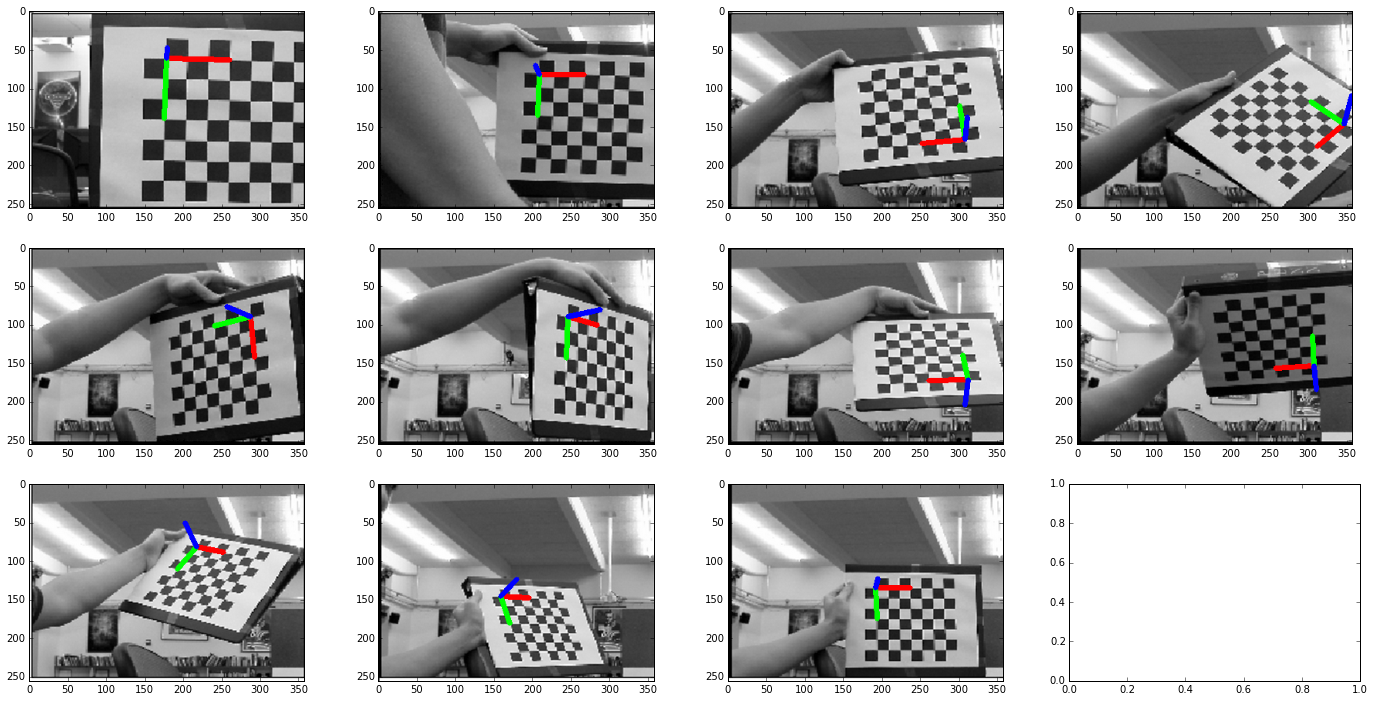

In [13]:
f, ax = plt.subplots(nh, nw, figsize=(6*nw, 4*nh))

for i in range(nh):
    for j in range(nw):
        #print(i)
        if (i*nw + j >= len(res)):
            break
        ax[i, j].imshow(res[i*nw + j])
        
plt.show()